# <span style="color:red"> Laboratorio di Simulazione Numerica (LSN) </span>

#### Luca Camillini - Luglio 2021

## <span style="color:blue">  Esercitazione 9</span>

### Il problema del Commesso Viaggiatore (CV)

Consideriamo un insieme di $N$ città disposte in maniera casuale su una regione. Qual è il percorso più breve che le visita tutte senza ripassare da alcuna di esse? Tale problema è un problema di ottimizzazione, in cui il commesso viaggiatore che deve visitare tutte queste città vuole ridurre al minimo la distanza percorsa. Analizziamo il problema dal punto di vista combinatorio: ogni percorso è descritto da una successione di interi, da $0$ a $N-1$, che indicano la città da visitare. Calcolando la lunghezza del percorso di tutte le permutazioni di questa successione si può scegliere la permutazione che la minimizza, ma questo ha un costo computazionale eccessivo. Per questo sono stati sviluppati i cosiddetti *algoritmi genetici* che, partendo da una *generazione 0* di soluzioni possibili, creano figli per la generazione successiva a partire da genitori più "forti". Dopo un numero di generazioni sufficientemente elevato si arriverà vicino alla soluzione ottimale, nella migliore delle ipotesi alla soluzione ottimale stessa.

Nel presente problema la funzione da minimizzare è il quadrato della distanza percorsa data una certa successione di città da visitare:
$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$
$\vec{x_{i}}$ rappresenta la posizione dell'*i-esima* città. Gli individui più forti sono quelli che hanno $L^{(2)}$ minore.

Di seguito presenteremo la classe scritta per risolvere questo problema di ottimizzazione e i risultati ottenuti per due configurazioni diverse:
1. 34 città disposte su una circonferenza di raggio $R=1$
2. 34 città disposte all'interno di una regione quadrata di lato $1$.

### Genetic Algorithm Class (GAC)

Per utilizzare l'algoritmo genetico abbiamo implementato una classe in grado di disporre le città all'interno di una regione predeterminata, costruire una popolazione di individui, far evolvere la popolazione di generazione in generazione ed estrarre le informazioni che presenteremo durante questo notebook. 
Le soluzioni del problema sono rappresentate da un vettore di interi $i \in [0,N-1]$, di seguito saranno indicate come *individui* o *cromosomi*. La popolazione consiste di una matrice dove ogni riga è un cromosoma. 

**Private.** Esso è costituito dai seguenti elementi: 
- Tipologia della disposizione delle città: la classe è in grado di distribuire le città su una circonferenza oppure all'interno di un quadrato.
- Numero di città (numero di geni per cromosoma), indicato di seguito con $N$.
- Numero di elementi in una popolazione (ovvero il numero di cromosomi), indicato di seguito con $M$.
- La matrice della popolazione.
- Una matrice contente le coordinate delle città.

#### **Metodi**
#### First_Gen()
In questo metodo viene creata la *generazione 0*. Il primo cromosoma è costituito dalla successione ordinata delle $i \in [0,N-1]$. Vengono poi creati altri individui tramite scambi casuali tra gli elementi del primo cromosoma, scambi tra due regioni oppure scrivendo al contrario alcune regioni del cromosoma. Il tutto crea $M$ individui diversi.

#### Next_Gen()
La generazione successiva prevede la creazione di $M$ nuovi figli a partire dalla popolazione precedente, tramite il seguente procedimento:
- Scelta di due genitori
- Generazione di due figli tramite *crossover* con alta probabilità del $90\%$
- *Mutazione* dei geni dei figli con probabilità del $7\%$

**Il primo punto**, quindi, è la scelta dei due genitori. Affinché l'algoritmo genetico funzioni è necessario scegliere con maggiore probabilità gli individui "più forti", così da generare figli forti. Per questo è necessario valutare la *fitness* dell'individuo: per il problema da noi considerato usiamo come parametro di *fitness* il quadrato della distanza percorsa dal commesso viaggiatore. Minore è tale distanza, più forte reputiamo il nostro individuo. Dopodiché ordiniamo i cromosomi della popolazione in ordine di fitness decrescente e selezioniamo i due genitori con il seguente algoritmo: $j= int(M \times r^p)+1$ dove 
- $r$ è un numero generato casualmente in maniera uniforme sull'intervallo $[0,1]$,
- $p$ è l'esponente che permette di prediligere alcuni valori di $j$ piuttosto che altri. Nel programma implementato $p=2$, per scegliere maggiormente i valori di $j$ più bassi (ricordiamo che nella popolazione ordinata secondo la fitness i cromosomi più forti sono i primi).

**Il secondo punto** consiste nel far avvenire il *crossover* tra i genitori. Scelti i due genitori, viene poi scelto in maniera casuale un punto di taglio, *cut*. La parte di cromosoma dal *cut* in poi viene riempita scegliendo i geni dell'altro genitore che precedono il *cut*. Questi ultimi devo soddisfare due condizioni:
1. rispettare l'ordine in cui compaiono nel genitore dal quale vengono presi,
2. essere diversi da tutti i geni precedenti del cromosoma che sto generando.

**Il terzo punto** prevede che sui figli così ottenuti possano essere fatte delle mutazioni implementate nel metodo presentato più sotto. 

*Mutazioni* e *crossover* avvengo **lasciando invariato il punto di partenza del percorso**. Facendo evolvere la popolazione di generazione in generazione si riesce ad ottimizzare il problema.

Se non avviene *crossover* o *mutazione* la nuova generazione è costituita dai due genitori invariati.

#### Mutation(son)
Di seguito elenchiamo le possibili mutazioni che agiscono sul vettore di geni, *son*.
- **swap:** vengono individuati due elementi in maniera casuale e viene scambiata la posizione
- **Inversion:** scelti due estremi interni al cromosoma in maniera casuale, gli elementi interni vengo riscritti in ordine inverso
- **Cycle:** individuata una regione del cromosoma, gli elementi vengono traslati di una posizione verso sinistra. L'estremo originario di sinistra diventa l'estremo di destra.
- **Region swap:** viene individuato un *cut* in maniera casuale. Dopodiché la regione a destra del *cut* viene spostata a sinistra e viceversa.

### Circonferenza di raggio *R=1*

Vengono poste $34$ città su una circonferenza di raggio $R=1$, in maniera casuale. La popolazione è costituita da $200$ cromosomi e vengono effettuate $500$ generazioni. Le probabilità di crossover e mutazione sono così impostate: $p_{cross}=0.7$, $p_{mut}=0.05$. Esse sono state scelte per rendere l'algoritmo conservativo così da conservare i cromosomi migliori. Se si fossero scelte probabilità più elevate si sarebbe perso in efficienza, in quanto buone soluzioni vengono modificate più frequentemente, perdendo i progressi fin lì fatti.

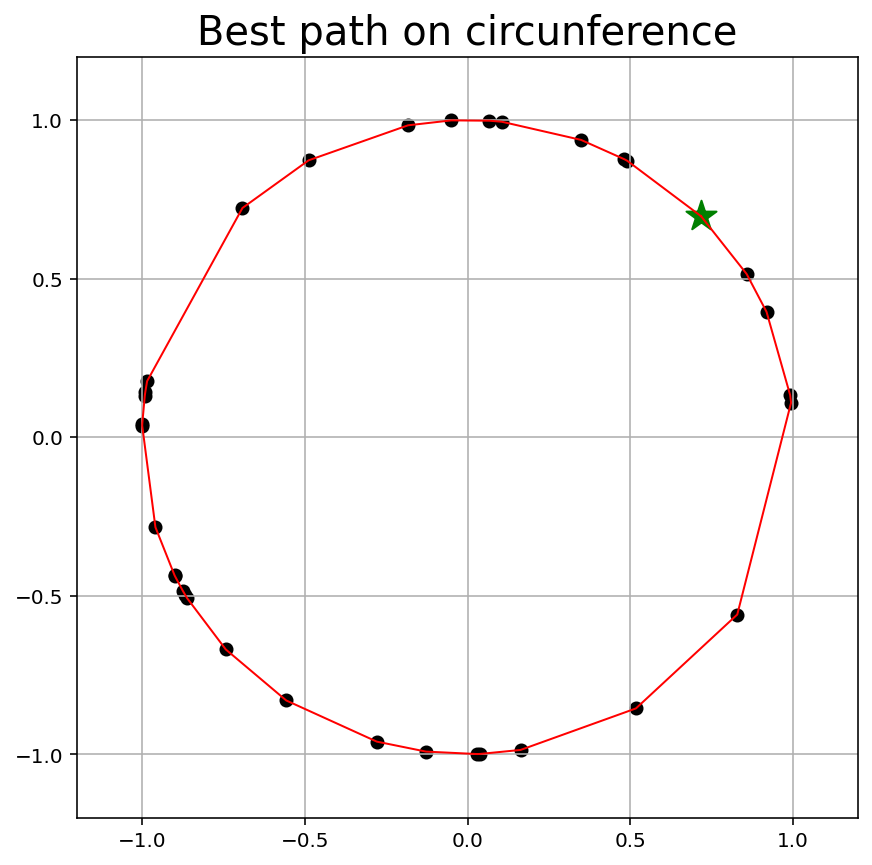

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import pandas as pd
%config InlineBackend.figure_format = 'retina'

pop = np.loadtxt('Esercizio 9/circonferenza/population.dat')
cities = np.loadtxt('Esercizio 9/circonferenza/cities_coordinates.dat')

gen = 500

fig, ax = plt.subplots(figsize=(7,7))
x_0 = np.zeros((2,35))
i=0
for city in pop[gen]:
    x_0[0][i]=cities[int(city)][0]
    x_0[1][i] = cities[int(city)][1]
    i+=1

ax.scatter(x_0[0],x_0[1], marker='o', color = 'black')
ax.scatter(x_0[0][0],x_0[1][0], marker='*', s=250, color='green')
ax.plot(x_0[0],x_0[1], color='red', linewidth=1)
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.set_title('Best path on circumference', size=20)
ax.grid()


(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x7fbaa06c4ac0>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x7fbaa06d11f0>)

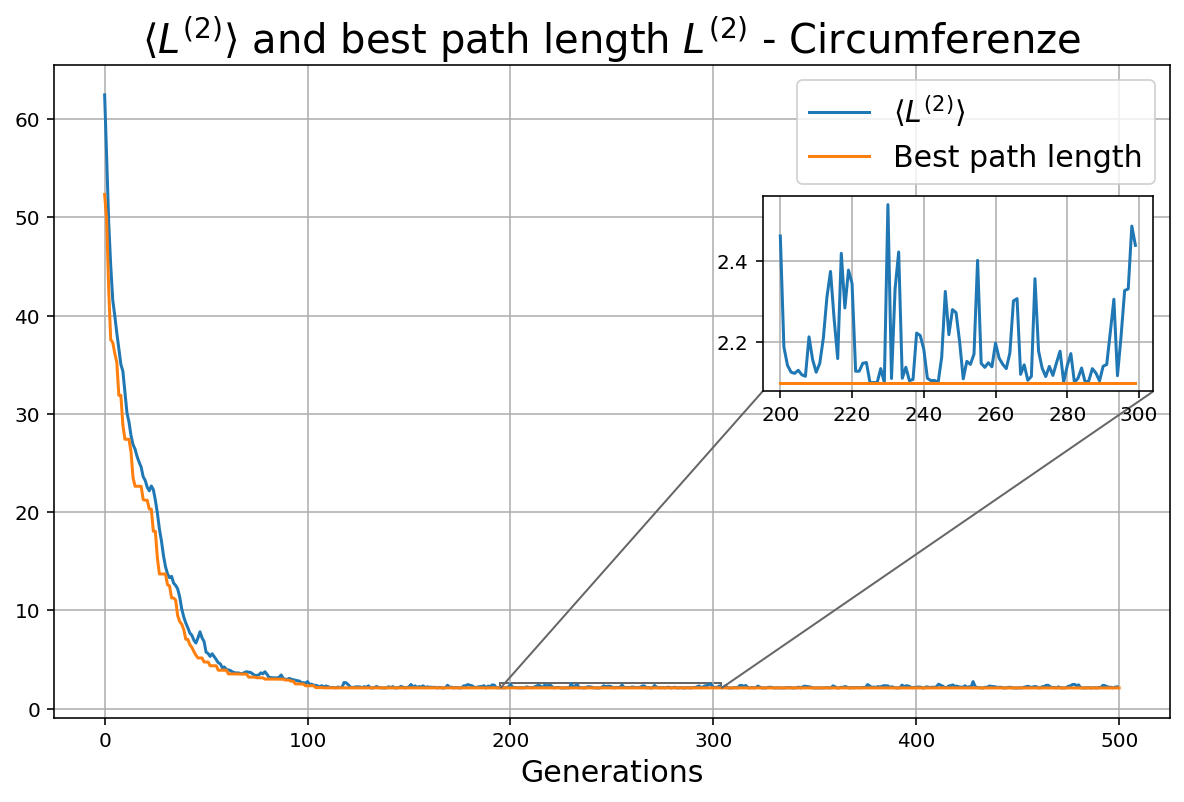

In [2]:
fitness = np.loadtxt("Esercizio 9/circonferenza/fitness.dat")
data_L_2 = np.loadtxt("Esercizio 9/circonferenza/best_half.dat")

L_2 = np.zeros(gen)
sigma_L_2 = np.zeros(gen)

for i in range(gen):
    L_2[i] = data_L_2[i][0]
    sigma_L_2[i] = data_L_2[i][1]

x = np.arange(0,500,1)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(L_2, label=r'$\langle L^{(2)}\rangle$')
ax.plot(fitness, label='Best path length')
ax.set_xlabel('Generations', size=15)
ax.set_title(r'$\langle L^{(2)}\rangle$ and best path length $L^{(2)}$ - Circumferenze', size=20)
ax.grid()
ax.legend(prop={'size':15})

axins=ax.inset_axes([0.635,0.5,0.35,0.3])
axins.plot(x[200:300],L_2[200:300])
axins.plot(x[200:300],fitness[200:300])
axins.grid()
mark_inset(ax, axins, loc1=3, loc2=4, ec='0.4')

Il primo grafico riportato mostra la disposizione delle città lungo la circonferenza unitaria, evidenziando la città di partenza. Come si può osservare, la soluzione trovata dall'algoritmo genetico è quella ottimale. È interessante poi commentare il secondo grafico riportato. Esso mostra $\langle L^{(2)} \rangle$ e $L^{(2)}_{best}$ di ogni generazione. Il primo è la distanza media dei percorsi individuati dalla prima metà di cromosomi della popolazione, il secondo mostra la distanza percorsa dal cromosoma migliore. Come si può osservare nella regione ingrandita, $\langle L^{(2)} \rangle$ mostra discrepanze con $L^{(2)}_{best}$ e questo è positivo: infatti, significa che la popolazione contiene dell'informazione in più rispetto al cromosoma migliore. Se, invece, avessi cromosomi tutti uguali, non avrei più informazioni aggiuntive precludendo così la possibilità di generare nuovi individui più performanti.

### Quadrato di lato unitario

Similmente al caso precedente, vengono poste in maniera casuale $34$ città all'interno di una regione quadrata di lato $1$, avente il vertice inferiore sinistro centrato in $(0,0)$. La popolazione è ancora costituita da $200$ cromosomi e vengono effettuate $1000$ generazioni. La probabilità di crossover è $p_{cross}=0.5$. Rispetto al caso precedente, questo è più complesso e per questo è stato necessario aumentare la dimensione della popolazione e rendere l'algoritmo ancora più conservativo, dato che la soluzione ottimale è più difficile da trovare. Al tempo stesso, la probabilità di mutazione è stata impostata a $p_{mut}=0.1$. La scelta è dovuta al fatto che mutazioni puntuali sono comunque necessarie per non rimanere bloccati in una qualche configurazione, non ottimale, ma comunque migliore di altre.

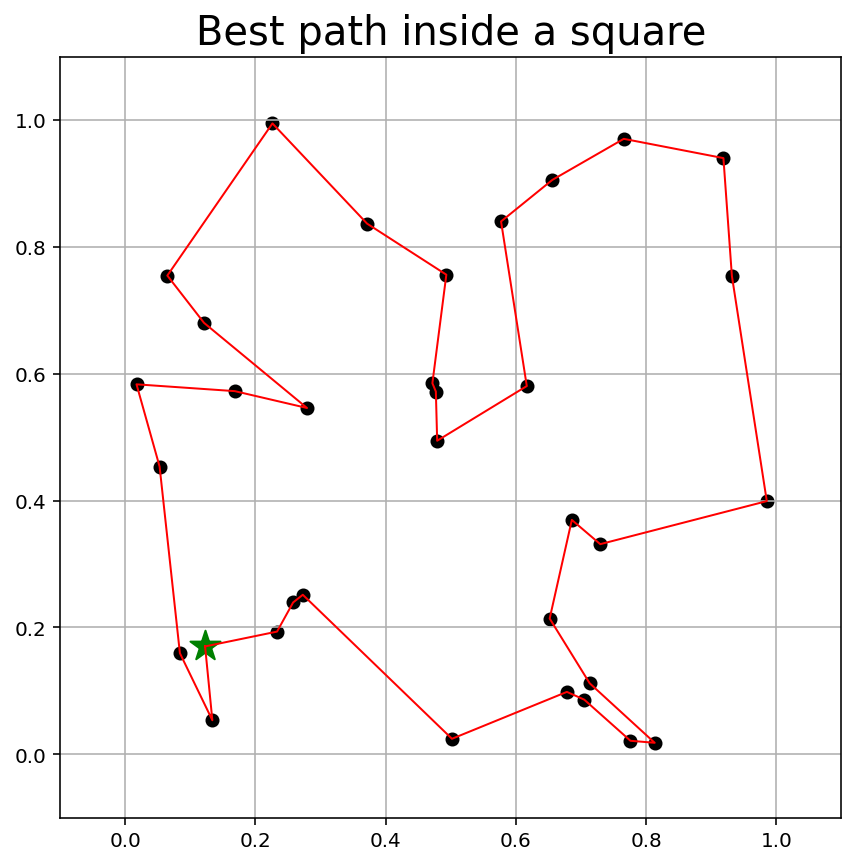

In [3]:
pop = np.loadtxt('Esercizio 9/quadrato/population.dat')
cities = np.loadtxt('Esercizio 9/quadrato/cities_coordinates.dat')

gen = 1000

fig, ax = plt.subplots(figsize=(7,7))
x_0 = np.zeros((2,35))
i=0
for city in pop[gen]:
    x_0[0][i]=cities[int(city)][0]
    x_0[1][i] = cities[int(city)][1]
    i+=1

ax.scatter(x_0[0],x_0[1], marker='o', color = 'black')
ax.scatter(x_0[0][0],x_0[1][0], marker='*', s=250, color='green')
ax.plot(x_0[0],x_0[1], color='red', linewidth=1)
ax.set_xlim(-0.1,1.1)
ax.set_ylim(-0.1,1.1)
ax.set_title('Best path inside a square', size=20)
ax.grid()


(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x7fbab29f5f10>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x7fbad0e89640>)

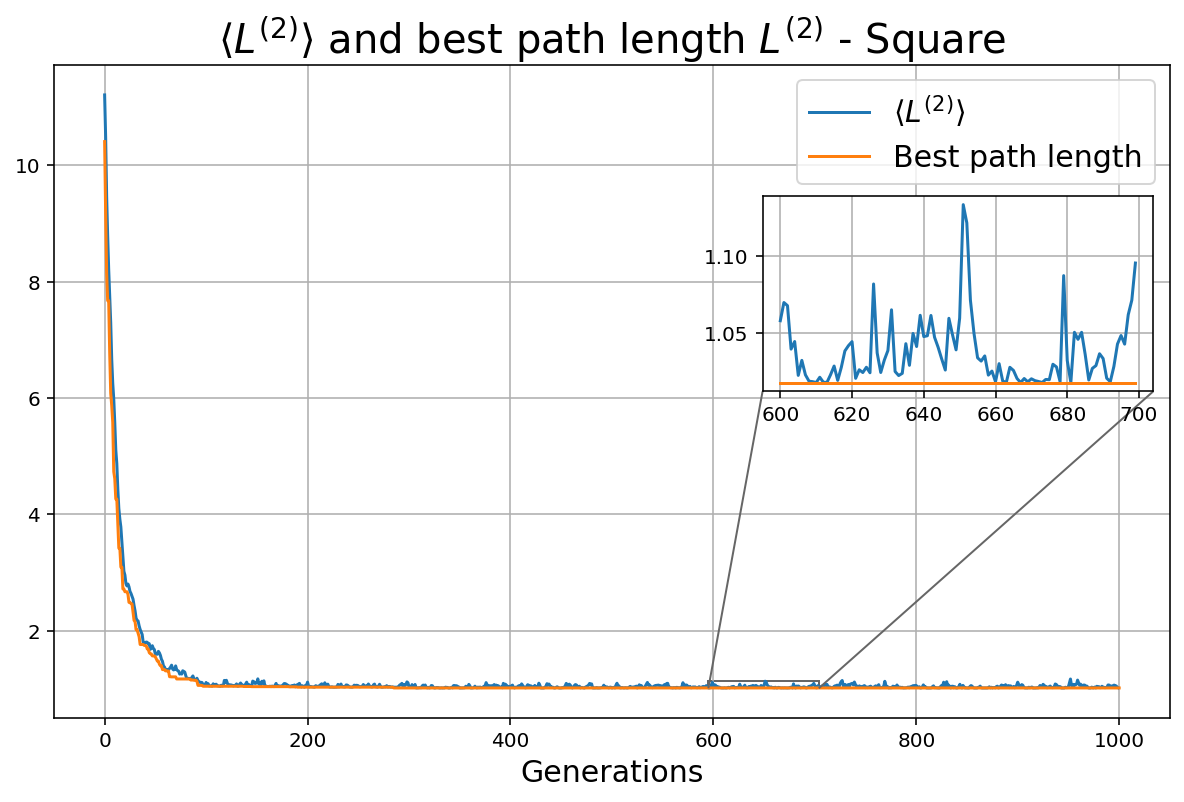

In [4]:
fitness = np.loadtxt("Esercizio 9/quadrato/fitness.dat")
data_L_2 = np.loadtxt("Esercizio 9/quadrato/best_half.dat")

L_2 = np.zeros(gen)
sigma_L_2 = np.zeros(gen)

for i in range(gen):
    L_2[i] = data_L_2[i][0]
    sigma_L_2[i] = data_L_2[i][1]

x = np.arange(0,1000,1)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(L_2, label=r'$\langle L^{(2)}\rangle$')
ax.plot(fitness, label='Best path length')
ax.set_xlabel('Generations', size=15)
ax.set_title(r'$\langle L^{(2)}\rangle$ and best path length $L^{(2)}$ - Square', size=20)
ax.grid()
ax.legend(prop={'size':15})

axins=ax.inset_axes([0.635,0.5,0.35,0.3])
axins.plot(x[600:700],L_2[600:700])
axins.plot(x[600:700],fitness[600:700])
axins.grid()
mark_inset(ax, axins, loc1=3, loc2=4, ec='0.4')

Anche in questo caso la migliore soluzione trovata dall'algoritmo genetico presenta un percorso accettabile e senza incroci tra città opposte che allungano la distanza percorsa. In questo caso, però, ricaviamo maggior informazioni dal secondo grafico in quanto non conosciamo a priori la soluzione migliore (cosa che invece accadeva con le città disposte sulla circonferenza). Ancora, sia $\langle L^{(2)} \rangle$ che $L^{(2)}_{best}$, mostrano convergenza molto rapida al passare delle generazioni. Inoltre, si osservano ancora le discrepanze tra le due osservabili, segno positivo che le soluzioni non sono rimaste "bloccate" attorno a un particolare cromosoma.